In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
data_dir = 'outputs/'
os.listdir(data_dir)

['BDPA_Overhauser_gB1_0p2MHz_400MHz_263GHz_MAS8kHz_fp_m.result',
 'BDPA_Overhauser_d3A_gB1_0p5MHz_400MHz_263GHz_MAS8kHz_fp_l.result',
 'BDPA_Overhauser_d4A_gB1_0p5MHz_400MHz_263GHz_MAS8kHz_fp_m.result',
 'BDPA_Overhauser_gB1_0p5MHz_400MHz_263GHz_MAS8kHz_fp_m.result',
 'BDPA_Overhauser_400MHz_263GHz_MAS8kHz_fp_l.result',
 'BDPA_Overhauser_d3A_gB1_0p5MHz_400MHz_263GHz_MAS8kHz_fp_r.result',
 'BDPA_Overhauser_d4A_gB1_0p5MHz_400MHz_263GHz_MAS8kHz_fp_l.result',
 'BDPA_Overhauser_gB1_0p2MHz_400MHz_263GHz_MAS8kHz_fp_l.result',
 'BDPA_Overhauser_400MHz_263GHz_MAS8kHz_fp_m.result',
 'BDPA_400MHz_263GHz_fp.result',
 'BDPA_Overhauser_400MHz_263GHz_fp.result',
 'BDPA_Overhauser_gB1_0p5MHz_400MHz_263GHz_MAS8kHz_fp_l.result',
 'BDPA_Overhauser_gB1_0p2MHz_400MHz_263GHz_MAS8kHz_fp_r.result',
 'BDPA_Overhauser_d3A_gB1_0p5MHz_400MHz_263GHz_MAS8kHz_fp_m.result',
 'BDPA_Overhauser_400MHz_263GHz_MAS8kHz_fp_r.result',
 'BDPA_Overhauser_d4A_gB1_0p5MHz_400MHz_263GHz_MAS8kHz_fp_r.result',
 'BDPA_Overhauser_gB1_

In [3]:
def assemble_results(prefix, data_dir):
    """concatenate l, m, and r parts of a simulation result.
    
    :param prefix: str, prefix of the filename.
    :param data_dir: str, folder that result files reside in.
    :returns: a pandas dataframe.
    """
    filenames = [
        f'{prefix}_fp_{i}.result' for i in ['l', 'm', 'r']
    ]

    dfs = []
    for filename in filenames:
        filepath = os.path.join(data_dir, filename)
        df = pd.read_csv(filepath, skiprows=1, header=None)
        dfs.append(df)

    df_all = pd.concat(dfs)
    return df_all

### Microwave Field Strength $\gamma$$B_1$/2$\pi$ Dependence

In [4]:
prefix = 'BDPA_Overhauser_gB1_0p2MHz_400MHz_263GHz_MAS8kHz'
df_0p2mhz = assemble_results(prefix, data_dir)

prefix = 'BDPA_Overhauser_400MHz_263GHz_MAS8kHz'
df_1mhz = assemble_results(prefix, data_dir)

prefix = 'BDPA_Overhauser_gB1_0p5MHz_400MHz_263GHz_MAS8kHz'
df_0p5mhz = assemble_results(prefix, data_dir)

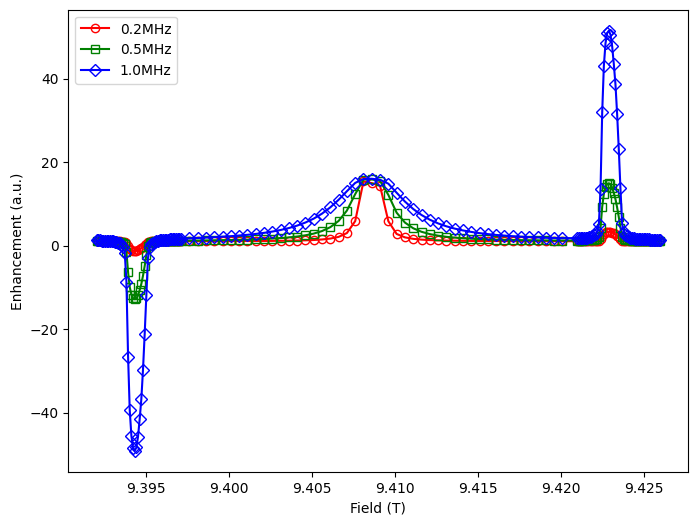

In [6]:
fig = plt.figure(figsize=(8, 6), dpi=100)
plt.plot(df_0p2mhz[0], df_0p2mhz[1], 'ro-', markerfacecolor='none', label='0.2MHz')
plt.plot(df_0p5mhz[0], df_0p5mhz[1], 'gs-', markerfacecolor='none', label='0.5MHz')
plt.plot(df_1mhz[0], df_1mhz[1], 'bD-', markerfacecolor='none', label='1.0MHz')
plt.xlabel('Field (T)')
plt.ylabel('Enhancement (a.u.)')
plt.legend()
plt.show()

### Dependence of Coupling Strengths Indicated by e-H Distances

In [7]:
prefix = 'BDPA_Overhauser_gB1_0p5MHz_400MHz_263GHz_MAS8kHz'
df_d5 = assemble_results(prefix, data_dir)

prefix = 'BDPA_Overhauser_d4A_gB1_0p5MHz_400MHz_263GHz_MAS8kHz'
df_d4 = assemble_results(prefix, data_dir)

prefix = 'BDPA_Overhauser_d3A_gB1_0p5MHz_400MHz_263GHz_MAS8kHz'
df_d3 = assemble_results(prefix, data_dir)

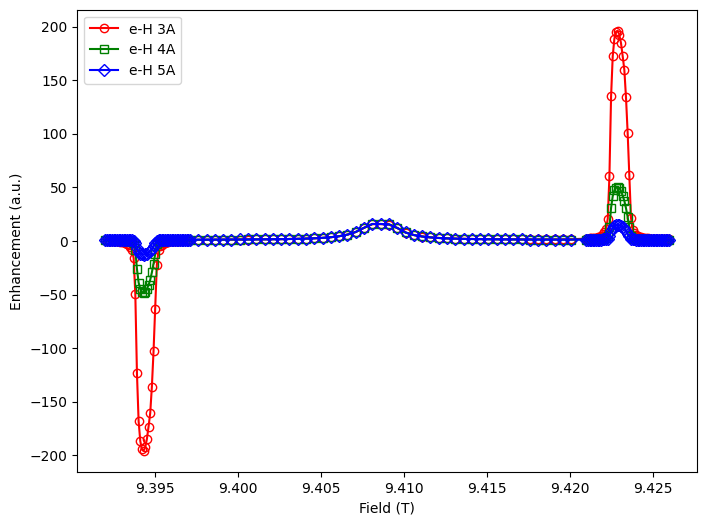

In [8]:
fig = plt.figure(figsize=(8, 6), dpi=100)
plt.plot(df_d3[0], df_d3[1], 'ro-', markerfacecolor='none', label='e-H 3A')
plt.plot(df_d4[0], df_d4[1], 'gs-', markerfacecolor='none', label='e-H 4A')
plt.plot(df_d5[0], df_d5[1], 'bD-', markerfacecolor='none', label='e-H 5A')
plt.xlabel('Field (T)')
plt.ylabel('Enhancement (a.u.)')
plt.legend()
plt.show()

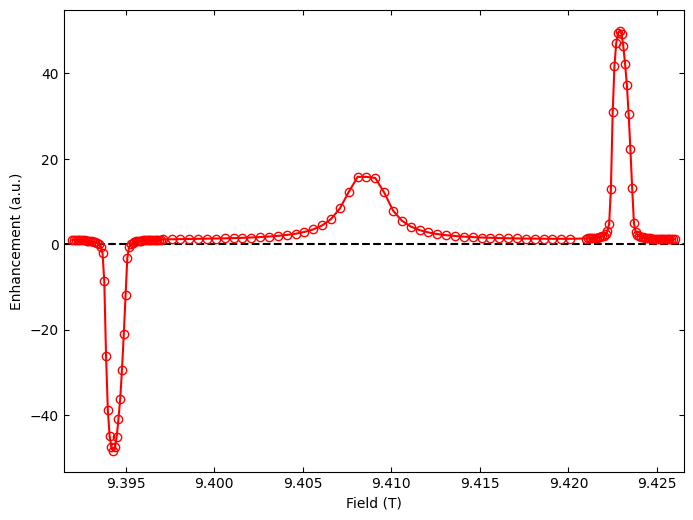

In [9]:
fig = plt.figure(figsize=(8, 6), dpi=100)
plt.hlines(0, 9.3915, 9.4265, linestyle='dashed', color='k')
plt.plot(df_d4[0], df_d4[1], 'ro-', markerfacecolor='none')
plt.xlabel('Field (T)')
plt.ylabel('Enhancement (a.u.)')
plt.tick_params(
    direction='in',
    bottom=True,
    top=True,
    left=True,
    right=True
)
plt.xlim(9.3915, 9.4265)
# plt.savefig('SE_OE_400MHz_fp_v2.ps')
plt.show()